<a href="https://colab.research.google.com/github/yhobany/generative-ai-for-beginners/blob/main/Forma_onda_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal


In [12]:
print(peaks[:5])


[14 32 66 85 99]


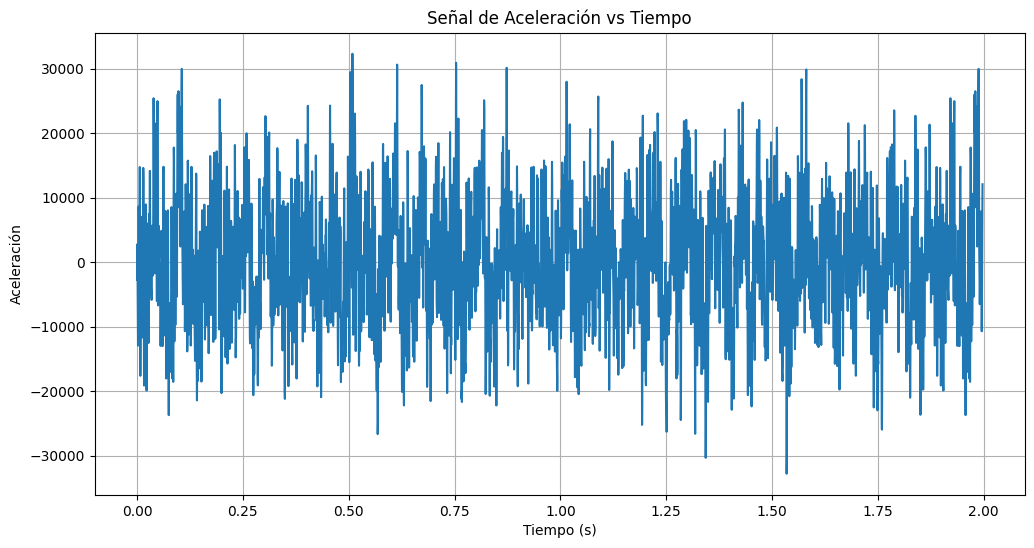

RMS de la aceleración: 9460.109982503765


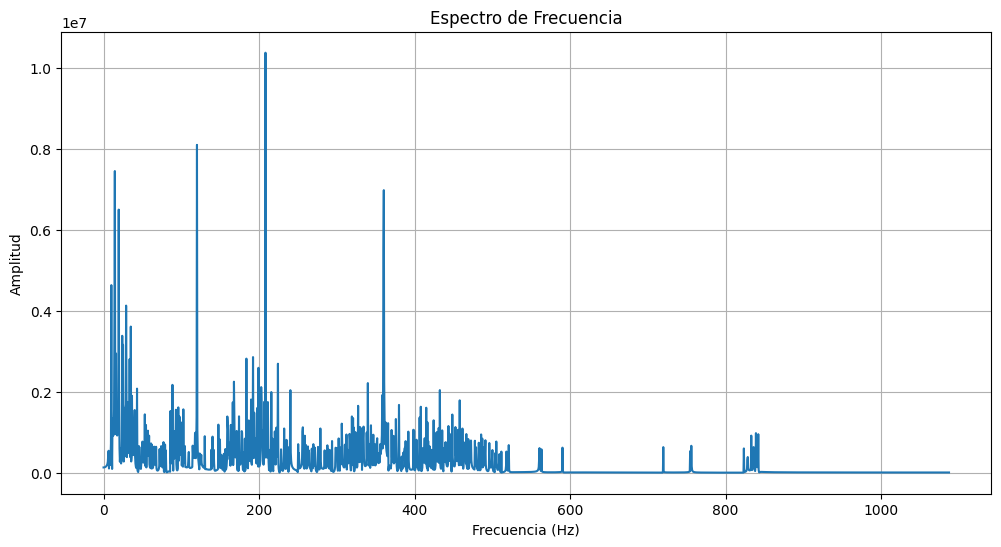

Frecuencia dominante: 208.23924545663675 Hz


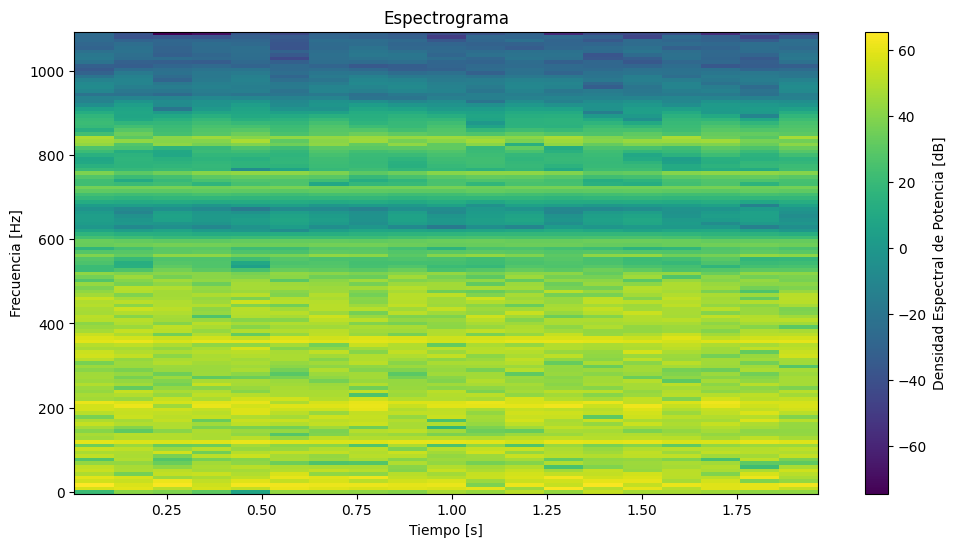

Kurtosis: -0.03315340527208077
Factor de cresta: 3.4637018026853537


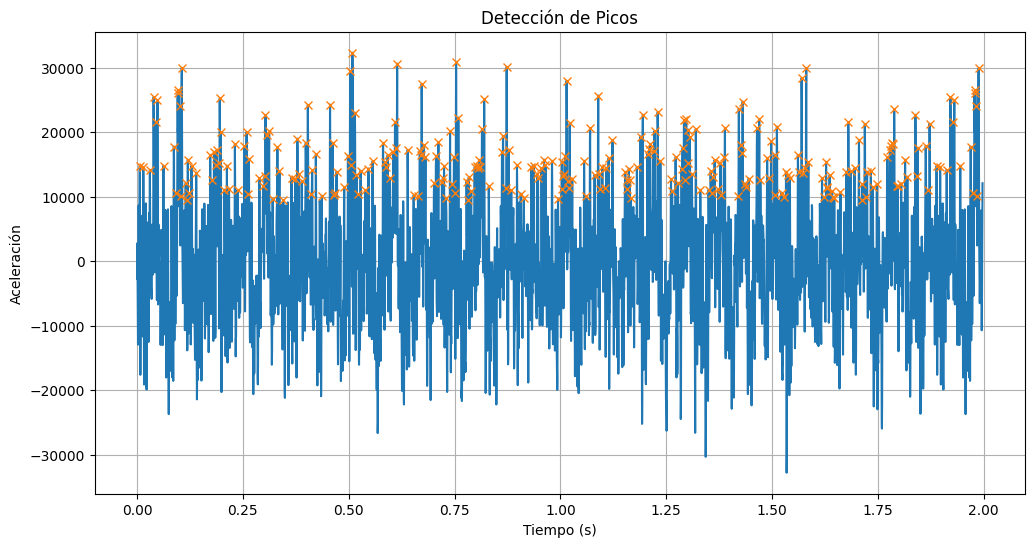

In [11]:
# Cargar los datos
df = pd.read_csv('/content/sample_data/04-Dec-23 1-40-34 PM.csv')  # Asegúrese de reemplazar con el nombre correcto de su archivo

# Extraer los datos
sample_rate = df['SampleRate'].iloc[0]
acceleration = df['Channel_1'].values

# Calcular el tiempo
time = np.arange(len(acceleration)) / sample_rate

# 1. Gráfico de la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(time, acceleration)
plt.title('Señal de Aceleración vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración')
plt.grid(True)
plt.show()

# 2. Calcular y mostrar RMS
rms = np.sqrt(np.mean(acceleration**2))
print(f"RMS de la aceleración: {rms}")

# 3. Análisis en el dominio de la frecuencia
n = len(acceleration)
freq = np.fft.fftfreq(n, d=1/sample_rate)
fft_vals = np.abs(fft(acceleration))

plt.figure(figsize=(12, 6))
plt.plot(freq[:n//2], fft_vals[:n//2])
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# 4. Encontrar la frecuencia dominante
dominant_freq = freq[np.argmax(fft_vals)]
print(f"Frecuencia dominante: {dominant_freq} Hz")

# 5. Calcular y mostrar el espectrograma
f, t, Sxx = signal.spectrogram(acceleration, fs=sample_rate)
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma')
plt.colorbar(label='Densidad Espectral de Potencia [dB]')
plt.show()

# 6. Calcular algunas características estadísticas
kurtosis = pd.Series(acceleration).kurtosis()
crest_factor = np.max(np.abs(acceleration)) / rms
print(f"Kurtosis: {kurtosis}")
print(f"Factor de cresta: {crest_factor}")

# 7. Detección simple de picos
from scipy.signal import find_peaks
peaks, _ = find_peaks(acceleration, height=np.std(acceleration))
plt.figure(figsize=(12, 6))
plt.plot(time, acceleration)
plt.plot(time[peaks], acceleration[peaks], "x")
plt.title('Detección de Picos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración')
plt.grid(True)
plt.show()


Si quieres acceder a los valores de aceleración correspondientes a estos picos, puedes usar estos índices para indexar el array acceleration:

In [13]:
valores_de_picos = acceleration[peaks]
print(valores_de_picos[:5])

[14760 14620 14167 25419 21578]


Esto crea un DataFrame con una columna llamada "Valores de Picos" que contiene los valores de valores_de_picos.

In [14]:
df_picos = pd.DataFrame({'Valores de Picos': valores_de_picos})

Esto guarda el DataFrame en un archivo CSV llamado "valores_de_picos.csv". El argumento index=False evita que se guarde el índice del DataFrame en el archivo.

In [15]:
df_picos.to_csv('valores_de_picos.csv', index=False)

Sí, puedes usar estadísticas descriptivas para resaltar los valores picos más representativos. Esto te dará información como la media, desviación estándar, mínimo, máximo, y cuartiles de los valores picos.

In [17]:
# Calcula estadísticas descriptivas
estadisticas = df_picos['Valores de Picos'].describe()
print(estadisticas)

count      281.000000
mean     15938.551601
std       5001.109682
min       9465.000000
25%      12153.000000
50%      14756.000000
75%      18188.000000
max      32319.000000
Name: Valores de Picos, dtype: float64


Identifica valores atípicos (outliers): Puedes usar el rango intercuartil (IQR) para identificar valores atípicos. Los valores que están 1.5 veces el IQR por encima del tercer cuartil o por debajo del primer cuartil se consideran atípicos.

In [19]:
Q1 = estadisticas['25%']
Q3 = estadisticas['75%']
IQR = Q3 - Q1
outliers = df_picos[(df_picos['Valores de Picos'] < (Q1 - 1.5 * IQR)) | (df_picos['Valores de Picos'] > (Q3 + 1.5 * IQR))]
print(outliers)

     Valores de Picos
13              29964
65              29467
67              32319
83              30635
89              27477
103             30911
120             30140
140             27976
222             28375
225             29878
280             29963


Visualiza los resultados: Puedes crear un histograma o un boxplot para visualizar la distribución de los valores picos y resaltar los valores atípicos.

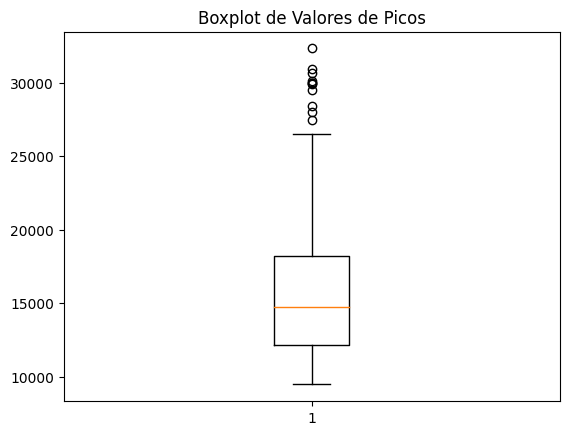

In [20]:
plt.boxplot(df_picos['Valores de Picos'])
plt.title('Boxplot de Valores de Picos')
plt.show()

El gráfico de boxplot muestra la distribución de los valores de los picos detectados en tu señal de aceleración.

Interpretación:

Caja (box): La caja central representa el rango intercuartil (IQR), que contiene el 50% central de los datos. El borde inferior de la caja es el primer cuartil (Q1), la línea en el medio es la mediana (segundo cuartil, Q2) y el borde superior es el tercer cuartil (Q3).
Bigotes (whiskers): Las líneas que se extienden desde la caja (bigotes) muestran el rango de los datos que no son considerados outliers. Usualmente se extienden hasta 1.5 veces el IQR desde los bordes de la caja.
Puntos individuales (outliers): Los puntos individuales fuera de los bigotes son considerados valores atípicos (outliers), que son valores significativamente diferentes del resto de los datos.
En tu caso:

El boxplot te permite ver si la distribución de los valores de los picos es simétrica o sesgada, y si existen valores atípicos. Si la mediana está en el centro de la caja y los bigotes tienen longitudes similares, la distribución es aproximadamente simétrica. Si la mediana está más cerca de uno de los bordes de la caja, la distribución es sesgada.

Los outliers pueden indicar eventos o mediciones inusuales en tu señal de aceleración.

Para una interpretación más precisa, considera el contexto de tu análisis y los valores específicos de las estadísticas descriptivas que calculaste previamente.

Valora esta respuesta


In [21]:
tiempos_de_picos = time[peaks]
diferencias_de_tiempo = np.diff(tiempos_de_picos)

In [22]:
desviacion_estandar = np.std(diferencias_de_tiempo)
print(f"Desviación estándar de las diferencias de tiempo: {desviacion_estandar}")

Desviación estándar de las diferencias de tiempo: 0.006237097795476964


Frecuencia dominante: 208.23924545663675 Hz
Armónicos: [416.4784909132735, 624.7177363699102, 832.956981826547, 1041.1962272831838, 1249.4354727398204]


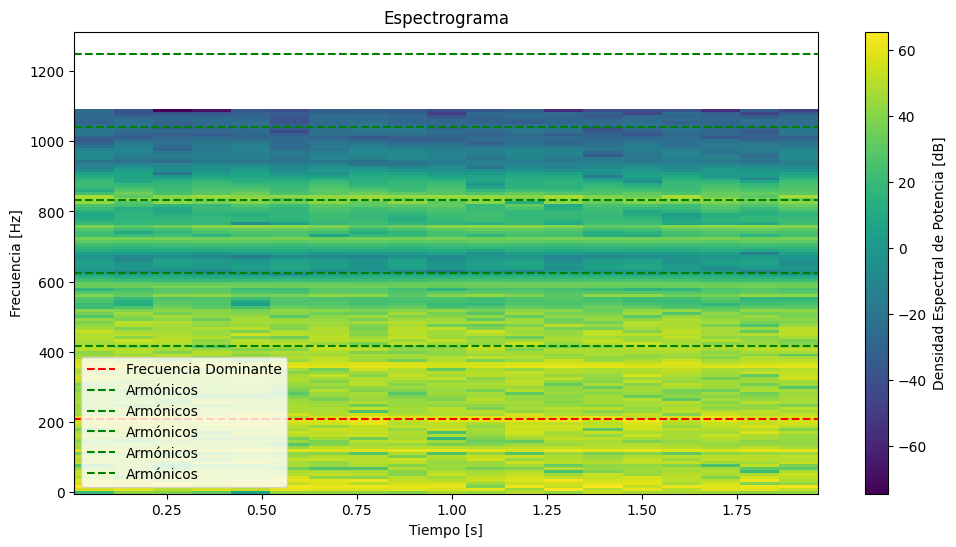

In [23]:
# 4. Encontrar la frecuencia dominante y sus armónicos
dominant_freq = freq[np.argmax(fft_vals)]
print(f"Frecuencia dominante: {dominant_freq} Hz")

# Identificar armónicos (por ejemplo, los primeros 5)
num_harmonics = 5
harmonics = [dominant_freq * i for i in range(2, num_harmonics + 2)]
print(f"Armónicos: {harmonics}")

# 5. Calcular y mostrar el espectrograma
f, t, Sxx = signal.spectrogram(acceleration, fs=sample_rate)
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma')
plt.colorbar(label='Densidad Espectral de Potencia [dB]')

# Marcar la frecuencia dominante y sus armónicos en el espectrograma
plt.axhline(y=dominant_freq, color='r', linestyle='--', label='Frecuencia Dominante')
for harmonic in harmonics:
    plt.axhline(y=harmonic, color='g', linestyle='--', label='Armónicos')

plt.legend()
plt.show()

Frecuencia dominante: 208.23924545663675 Hz
Armónicos: [416.4784909132735, 624.7177363699102, 832.956981826547, 1041.1962272831838, 1249.4354727398204]


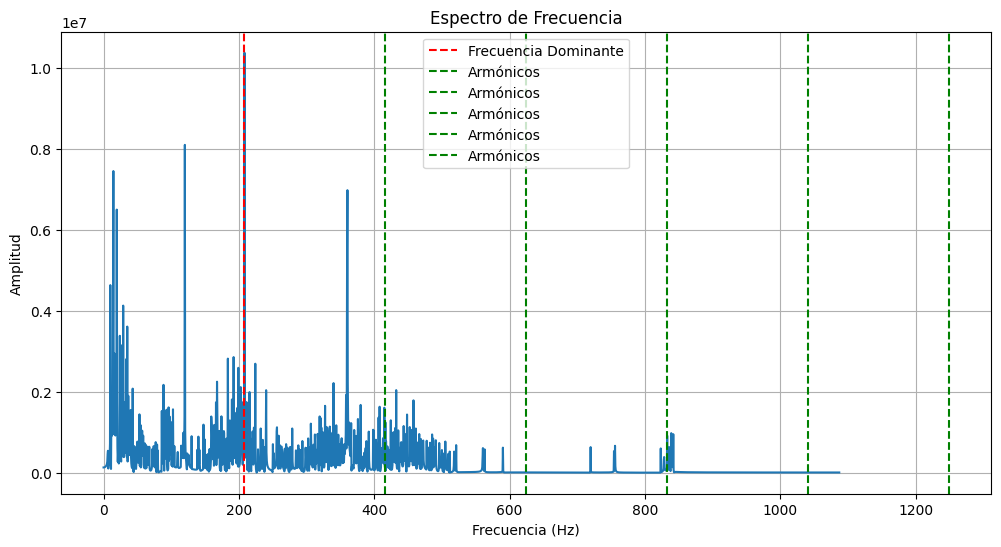

In [25]:
# 3. Análisis en el dominio de la frecuencia (con identificación de armónicos)
n = len(acceleration)
freq = np.fft.fftfreq(n, d=1/sample_rate)
fft_vals = np.abs(fft(acceleration))

# Encontrar la frecuencia dominante
dominant_freq_index = np.argmax(fft_vals[:n//2])
dominant_freq = freq[dominant_freq_index]
print(f"Frecuencia dominante: {dominant_freq} Hz")

# Identificar armónicos (por ejemplo, los primeros 5)
num_harmonics = 5
harmonics = [dominant_freq * i for i in range(2, num_harmonics + 2)]
print(f"Armónicos: {harmonics}")

plt.figure(figsize=(12, 6))
plt.plot(freq[:n//2], fft_vals[:n//2])
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

# Marcar la frecuencia dominante y sus armónicos en el espectro de frecuencia
plt.axvline(x=dominant_freq, color='r', linestyle='--', label='Frecuencia Dominante')
for harmonic in harmonics:
    plt.axvline(x=harmonic, color='g', linestyle='--', label='Armónicos')

plt.legend()
plt.show()

Explicación:

Encontrar la frecuencia dominante: Encontramos el índice de la frecuencia dominante en el array fft_vals (limitado a la primera mitad del espectro) y obtenemos la frecuencia correspondiente del array freq.
Identificar armónicos: Calculamos los primeros 5 armónicos multiplicando la frecuencia dominante por 2, 3, 4, 5 y 6.
Marcar en el espectro de frecuencia: Usamos plt.axvline para dibujar líneas verticales en el espectro de frecuencia que corresponden a la frecuencia dominante (en rojo) y sus armónicos (en verde).
Leyenda: Agregamos una leyenda para identificar las líneas en el gráfico.
Ahora, al ejecutar este código, verás el espectro de frecuencia con líneas verticales que indican la frecuencia dominante y sus armónicos, permitiéndote visualizar su presencia en el espectro.